In [10]:
pip install seabor

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seabor (from versions: none)
ERROR: No matching distribution found for seabor


In [2]:
!pip install geopandas

     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.1 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 648.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.1/1.1 MB 3.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.1 MB 6.0 MB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.1 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/22.9 MB ? eta -:--:--
   - -------------------------------------- 0.7/22.9 MB 8.9 MB/s eta 0:00:03
   - -------------------------------------- 0.9/22.9 MB 9.5 MB/s eta 0:00:03
   -- ------------------------------------- 1.3/22.9 MB 7.4 MB/s eta 0:00:03
   -- ------------------

In [4]:
!pip install haversine

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from shapely.geometry import Point
from haversine import haversine

In [7]:
data = pd.read_csv(r'C:\Users\sagar\Downloads\events.csv')

In [8]:
print(data.isnull().sum())

date            0
latitude        0
longitude       0
event-type      0
city            4
county        538
state           0
dtype: int64


In [9]:
print(data.dtypes)

date           object
latitude      float64
longitude     float64
event-type     object
city           object
county         object
state          object
dtype: object


In [10]:
print(data.describe())

            latitude      longitude
count  370251.000000  370251.000000
mean       39.557714     -91.896276
std         4.956872      13.171591
min         1.980000    -171.720000
25%        37.300000     -97.310000
50%        40.100000     -89.780000
75%        42.640000     -84.020000
max        75.000000      73.410000


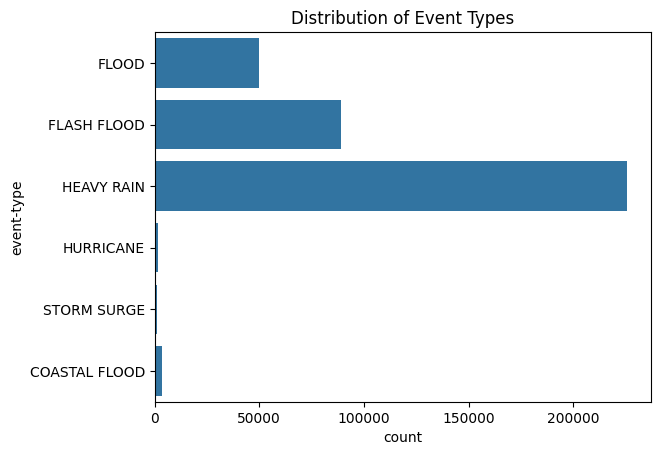

In [11]:
sns.countplot(data['event-type'])
plt.title('Distribution of Event Types')
plt.show()

In [12]:
features = data[['latitude', 'longitude']]

In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\sagar\AppData\Local\Temp\ipykernel_27544\355199012.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


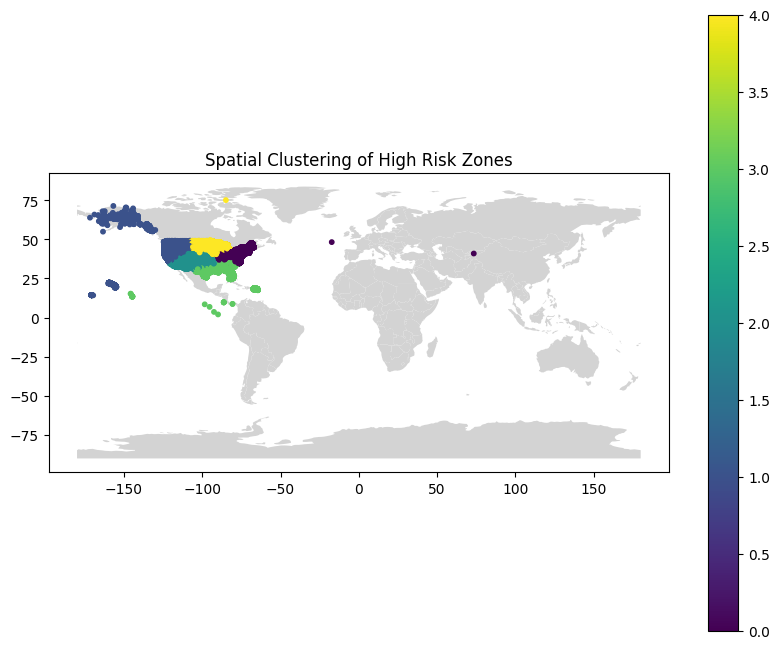

In [15]:
geometry = [Point(lon, lat) for lon, lat in zip(data['longitude'], data['latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, column='cluster', legend=True, cmap='viridis')
plt.title('Spatial Clustering of High Risk Zones')
plt.show()

In [17]:

data['year'] = pd.to_datetime(data['date'], format="%d-%m-%Y %H:%M").dt.year
yearly_counts = data['year'].value_counts()

In [18]:
def count_events_within_radius(lat, lon, radius_km=50):
    center_point = (lat, lon)
    data['distance'] = data.apply(lambda row: haversine(center_point, (row['latitude'], row['longitude'])), axis=1)
    events_within_radius = data[data['distance'] <= radius_km]
    return len(events_within_radius)

In [19]:
lat, lon = 40.7128, -74.0060  # Coordinates for New York City
total_events_nearby = count_events_within_radius(lat, lon)
print(f'Total events within 50 KM of New York City: {total_events_nearby}')

Total events within 50 KM of New York City: 2361


In [20]:
data.to_csv('processed_dataset.csv', index=False)

In [21]:
print(data)

                    date  latitude  longitude   event-type           city  \
0       01-01-2003 05:00     26.33     -81.14        FLOOD        UNKNOWN   
1       01-01-2003 05:00     27.22     -81.13        FLOOD        UNKNOWN   
2       01-01-2003 08:00     45.28    -120.12        FLOOD        UNKNOWN   
3       01-01-2003 14:15     38.54     -86.03        FLOOD        UNKNOWN   
4       01-01-2003 18:00     38.59     -85.38        FLOOD        UNKNOWN   
...                  ...       ...        ...          ...            ...   
370246  10-10-2022 19:10     18.38     -66.12  FLASH FLOOD       GUAYNABO   
370247  10-10-2022 19:43     18.39     -66.14  FLASH FLOOD  1 ENE BAYAMON   
370248  10-10-2022 20:36     18.44     -66.18        FLOOD      LEVITTOWN   
370249  10-10-2022 21:16     37.25    -112.95  FLASH FLOOD        ZION NP   
370250  10-10-2022 23:30     30.89    -102.89  FLASH FLOOD  FORT STOCKTON   

                            county state  cluster  year     distance  
0   